In [4]:
# importing the libraries and packages for data transformation and analysis
import pandas as pd
import numpy as np
import scipy
import matplotlib.pyplot as plt
import seaborn as sns
sns.set()
from sklearn.cluster import KMeans
from sklearn import preprocessing

In [3]:
# loading the dataset and viewing
data= pd.read_csv(r'Customer_Segmentation_Data.csv')
data.head()

,Customer_ID,Gender,Age,Married,Dependents,City,Zip_Code,Referrals,Tenure(Months),Tenure(Years),Contract_Type,Total_Revenue
0,0002-ORFBO,Female,37,Yes,0,Frazier Park,93225,2,9,0,One Year,974.81
1,0003-MKNFE,Male,46,No,0,Glendale,91206,0,9,0,Month-to-Month,610.28
2,0013-MHZWF,Female,23,No,3,Midpines,95345,0,9,0,Month-to-Month,722.38
3,0013-SMEOE,Female,67,Yes,0,Lompoc,93437,1,71,5,Two Year,8611.41
4,0014-BMAQU,Male,52,Yes,0,Napa,94558,8,63,5,Two Year,6214.28


In [5]:
# information about the dataset
data.shape

(5174, 12)

In [6]:
# descriptive statistics of the dataset
data.describe()

,Age,Dependents,Zip_Code,Referrals,Tenure(Months),Tenure(Years),Total_Revenue
count,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000,5174.000000
mean,45.344414,0.595284,93504.246811,2.468690,37.591225,2.700812,3418.374927
std,16.276025,1.045137,1868.574963,3.289687,24.085029,2.005929,2910.764954
min,19.000000,0.000000,90001.000000,0.000000,1.000000,0.000000,21.360000
25%,32.000000,0.000000,92069.000000,0.000000,15.000000,1.000000,938.575000
50%,45.000000,0.000000,93535.500000,1.000000,38.000000,3.000000,2579.325000
75%,58.000000,1.000000,95337.000000,5.000000,61.000000,5.000000,5463.415000
max,80.000000,9.000000,96148.000000,11.000000,72.000000,6.000000,11979.340000


In [7]:
data.dtypes

Customer_ID        object
Gender             object
Age                 int64
Married            object
 Dependents         int64
City               object
Zip_Code            int64
Referrals           int64
Tenure(Months)      int64
Tenure(Years)       int64
Contract_Type      object
Total_Revenue     float64
dtype: object

In [8]:
# converting data type to ensure consistency in formats
data['Total_Revenue']= data['Total_Revenue'].astype(int)

In [9]:
data.dtypes

Customer_ID       object
Gender            object
Age                int64
Married           object
 Dependents        int64
City              object
Zip_Code           int64
Referrals          int64
Tenure(Months)     int64
Tenure(Years)      int64
Contract_Type     object
Total_Revenue      int32
dtype: object

In [10]:
# checking for duplicates in the data
data.duplicated().sum()

0

In [11]:
# checking for null values
data.isnull().sum()

Customer_ID       0
Gender            0
Age               0
Married           0
 Dependents       0
City              0
Zip_Code          0
Referrals         0
Tenure(Months)    0
Tenure(Years)     0
Contract_Type     0
Total_Revenue     0
dtype: int64

In [ ]:
# removing irrelevant columns
data.drop(columns= ["Customer_ID", "Tenure(Years)"], inplace = True)

In [86]:
data.head()

,Gender,Age,Married,Dependents,City,Zip_Code,Referrals,Tenure(Months),Contract_Type,Total_Revenue
0,Female,37,Yes,0,Frazier Park,93225,2,9,One Year,974
1,Male,46,No,0,Glendale,91206,0,9,Month-to-Month,610
2,Female,23,No,3,Midpines,95345,0,9,Month-to-Month,722
3,Female,67,Yes,0,Lompoc,93437,1,71,Two Year,8611
4,Male,52,Yes,0,Napa,94558,8,63,Two Year,6214


In [87]:
# Examining relationship between variables in the data using Pearson correlation
data.corr()

,Age,Dependents,Zip_Code,Referrals,Tenure(Months),Total_Revenue
Age,1.000000,-0.108764,-0.007625,0.007993,0.052401,0.081890
Dependents,-0.108764,1.000000,0.039231,0.244435,0.053558,0.002680
Zip_Code,-0.007625,0.039231,1.000000,-0.001735,-0.001199,-0.004918
Referrals,0.007993,0.244435,-0.001735,1.000000,0.263234,0.219543
Tenure(Months),0.052401,0.053558,-0.001199,0.263234,1.000000,0.825361
Total_Revenue,0.081890,0.002680,-0.004918,0.219543,0.825361,1.000000


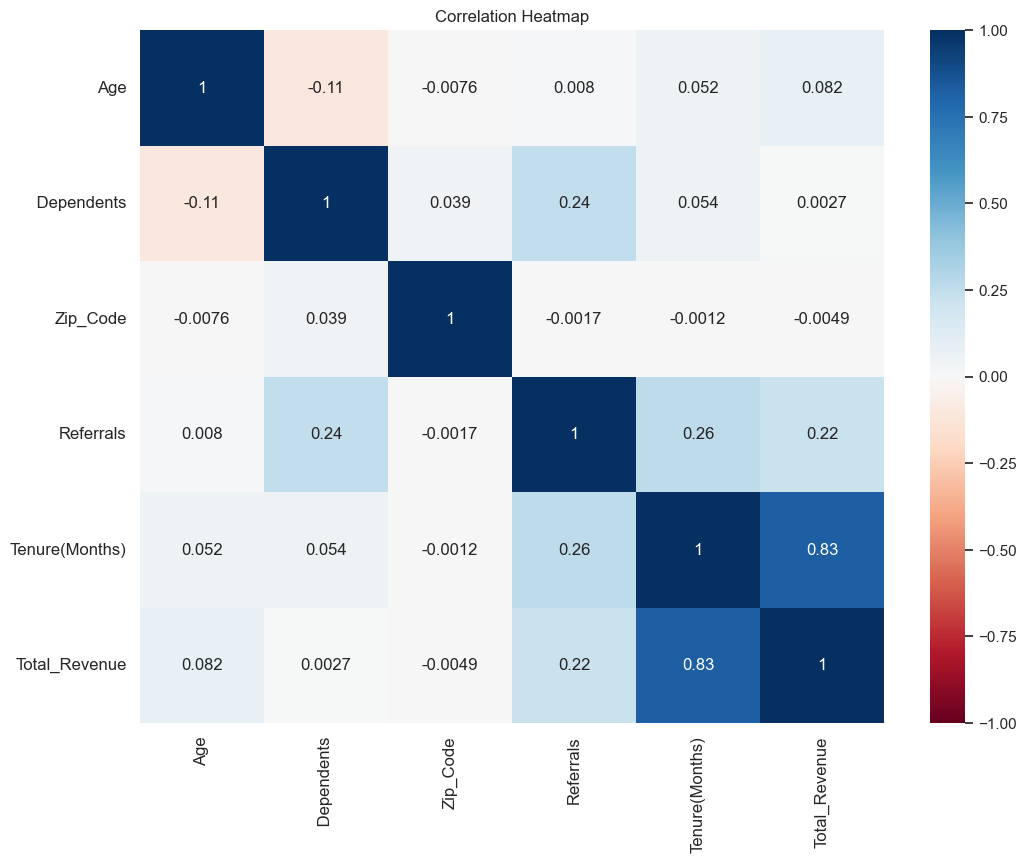

In [83]:
# Visualizing the correlations
plt.figure(figsize = (12,9))
s = sns.heatmap(data.corr(),
                annot = True,
                cmap = 'RdBu',
                vmin = -1,
                vmax = 1)
s.set_yticklabels(s.get_yticklabels(),rotation = 0, fontsize = 12)
s.set_xticklabels(s.get_xticklabels(),rotation = 90, fontsize = 12)
plt.title('Correlation Heatmap')
plt.show()

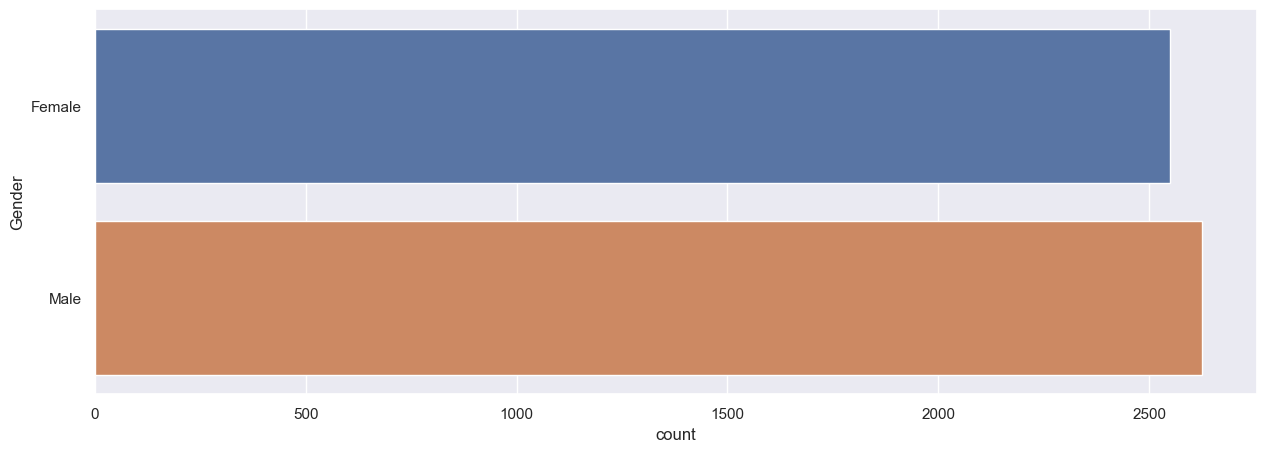

In [14]:
# visualizing demographics data
plt.figure(figsize=(15,5))
sns.countplot(y='Gender', data=data)
plt.show()

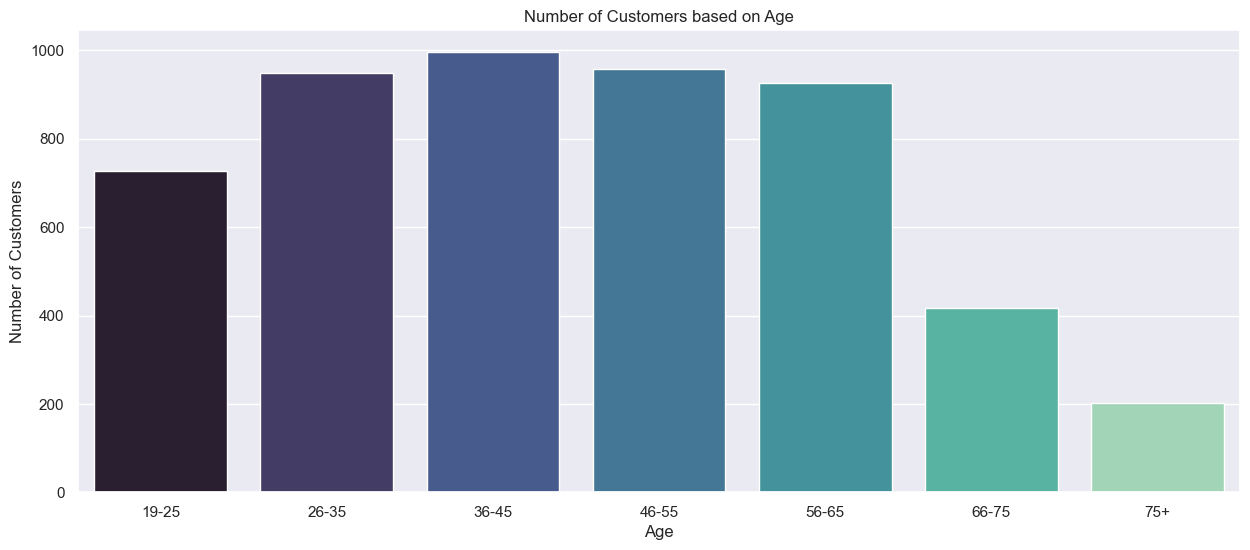

In [15]:
age_19_25 = data.Age[(data.Age >= 19) & (data.Age <= 25)]
age_26_35 = data.Age[(data.Age >= 26) & (data.Age <= 35)]
age_36_45 = data.Age[(data.Age >= 36) & (data.Age <= 45)]
age_46_55 = data.Age[(data.Age >= 46) & (data.Age <= 55)]
age_56_65 = data.Age[(data.Age >= 56) & (data.Age <= 65)]
age_66_75 = data.Age[(data.Age >= 66) & (data.Age <= 75)]
age_75above = data.Age[data.Age >=76]

agex = ["19-25","26-35","36-45","46-55","56-65","66-75","75+"]
agey = [len(age_19_25.values),len(age_26_35.values),len(age_36_45.values),len(age_46_55.values),len(age_56_65.values),len(age_66_75.values),len(age_75above.values)]

plt.figure(figsize=(15,6))
sns.barplot(x=agex, y=agey, palette= "mako")
plt.title("Number of Customers based on Age")
plt.xlabel("Age")
plt.ylabel("Number of Customers")
plt.show()

In [64]:
# normalizing data for clustering
x_data= preprocessing.normalize(data[['Referrals','Tenure(Months)','Total_Revenue']])

In [65]:
kmeans= KMeans(n_clusters=3, random_state=0,n_init='auto')
kmeans.fit(x_data)

KMeans(n_clusters=3, n_init='auto', random_state=0)

In [66]:
x_data

array([[2.05329611e-03, 9.23983248e-03, 9.99955204e-01],
       [0.00000000e+00, 1.47524928e-02, 9.99891176e-01],
       [0.00000000e+00, 1.24644056e-02, 9.99922316e-01],
       ...,
       [0.00000000e+00, 1.55020130e-02, 9.99879837e-01],
       [1.04833380e-03, 1.40476729e-02, 9.99900777e-01],
       [2.69720955e-04, 1.69924202e-02, 9.99855582e-01]])

In [67]:
normalized_data= x_data= pd.DataFrame(x_data, index=data.index, columns= ("Referrals","Tenure(Months)","Total_Revenue"))
normalized_data

,Referrals,Tenure(Months),Total_Revenue
0,0.002053,0.009240,0.999955
1,0.000000,0.014752,0.999891
2,0.000000,0.012464,0.999922
3,0.000116,0.008245,0.999966
4,0.001287,0.010138,0.999948
...,...,...,...
5169,0.000000,0.007883,0.999969
5170,0.000000,0.009636,0.999954
5171,0.000000,0.015502,0.999880
5172,0.001048,0.014048,0.999901


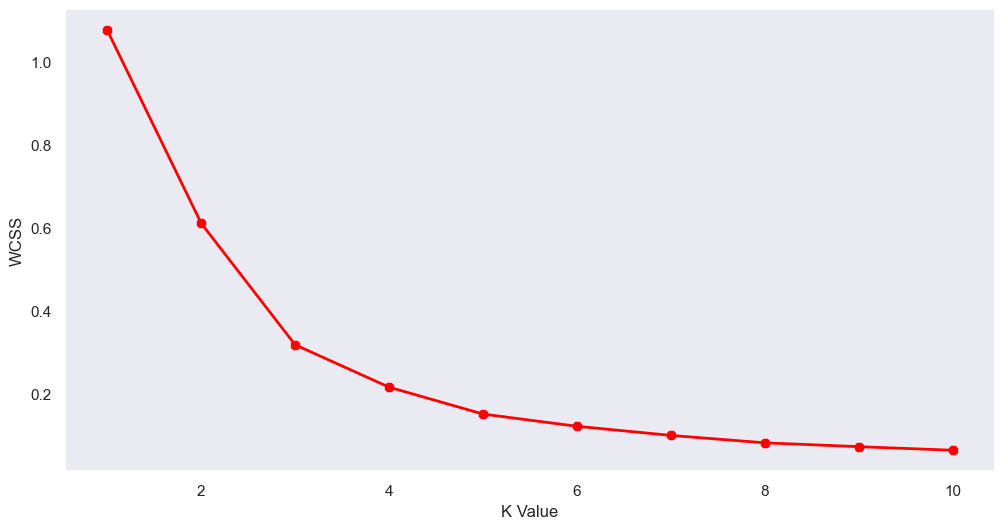

In [81]:
# using the Elbow method to determine the number of clusters
X1= normalized_data.loc[:, ["Referrals","Tenure(Months)","Total_Revenue"]].values

wcss = []
for k in range(1,11):
    kmeans = KMeans(n_clusters=k, init="k-means++")
    kmeans.fit(X1)
    wcss.append(kmeans.inertia_)
plt.figure(figsize=(12,6))
plt.grid()
plt.plot(range(1,11),wcss, linewidth=2, color= "red", marker= "8")
plt.xlabel("K Value")
plt.ylabel("WCSS")
plt.show()

In [82]:
# using the k-means algorithm for data clustering
kmeans = KMeans(n_clusters=4)
label = kmeans.fit_predict(X1)
print(label)

[0 0 0 ... 0 0 0]


In [73]:
print(kmeans.cluster_centers_)

[[9.69148258e-04 1.11774627e-02 9.99927302e-01]
 [1.69395912e-01 2.12889597e-02 9.84355373e-01]
 [2.25787466e-03 2.92303860e-02 9.99531730e-01]
 [6.05651115e-02 2.49834588e-02 9.97590646e-01]]


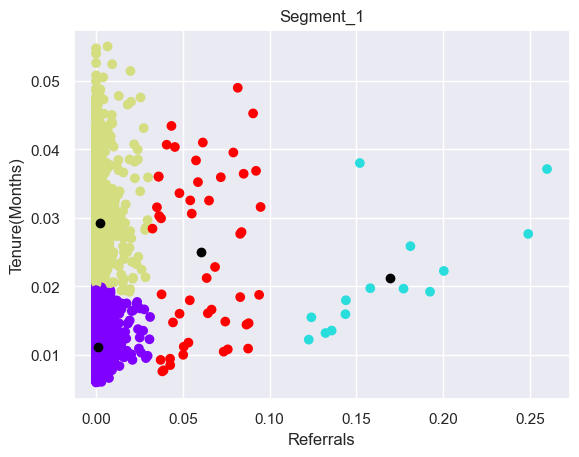

In [88]:
plt.scatter(X1[:,0], X1[:,1], c=kmeans.labels_, cmap= 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,0], kmeans.cluster_centers_[:,1], color= 'black')
plt.title("Segment_1")
plt.xlabel("Referrals")
plt.ylabel("Tenure(Months)")
plt.show()

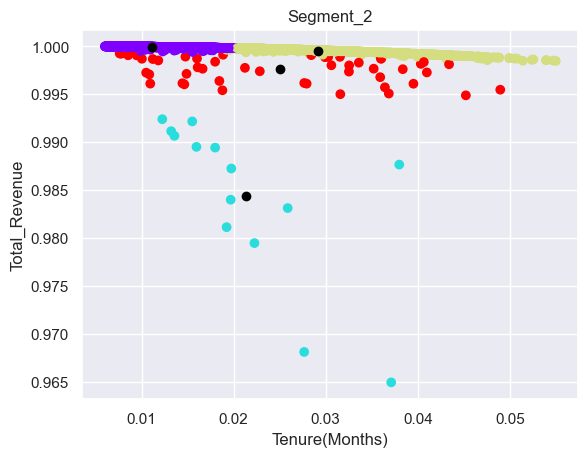

In [89]:
plt.scatter(X1[:,1], X1[:,2], c=kmeans.labels_, cmap= 'rainbow')
plt.scatter(kmeans.cluster_centers_[:,1], kmeans.cluster_centers_[:,2], color= 'black')
plt.title("Segment_2")
plt.xlabel("Tenure(Months)")
plt.ylabel("Total_Revenue")
plt.show()